<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [115]:
# Set your student number
student_number = 400101934
Name = 'Nikoo'
Last_Name = 'Moradi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [116]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [117]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [118]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())


Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [119]:
## FILL HERE

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# print(f"Features tensor: \n {test_set[10][0]} \n")
# print(f"Labels tensor: \n {test_set[10][1]}")
print(f"\nShape of the image of the first data: {train_set[0][0].shape}")
print(f"\nLabel of the first data: {train_set[0][1]}")


x,y,z = train_set[0][0].shape
input_dim = x*y*z

print(f"\nInput dimemntion of the first layer: {input_dim} \n")

unique_labels = set(train_set.targets.numpy())
num_classes = len(unique_labels)
print(f"The number of classes in FashionMNIST : {num_classes}")



Shape of the image of the first data: torch.Size([1, 28, 28])

Label of the first data: 9

Input dimemntion of the first layer: 784 

The number of classes in FashionMNIST : 10


In [120]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

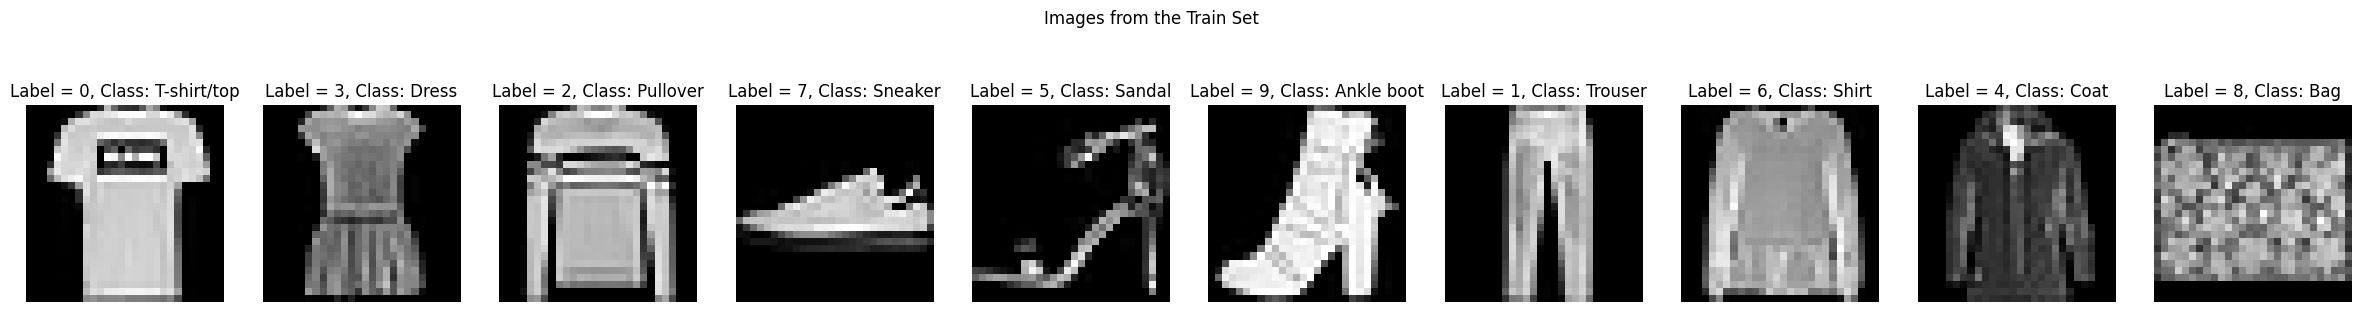

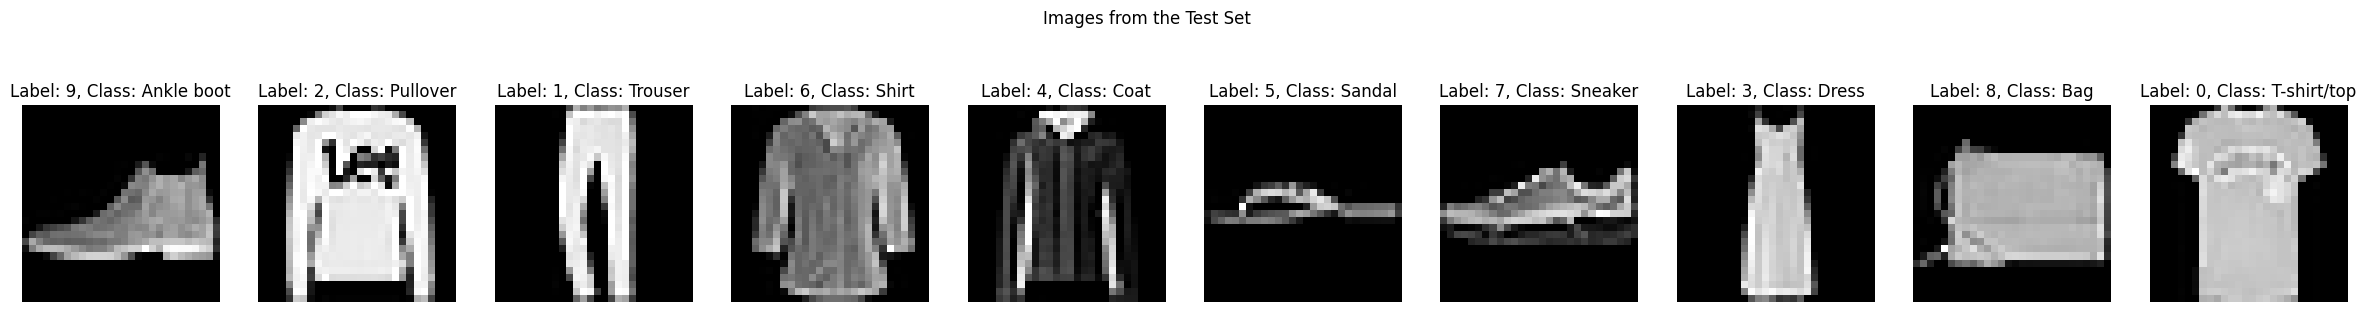

In [121]:

# Visualizing it
plt.figure(figsize=(30,4))
plt.suptitle("Images from the Train Set")
count = 0
labels_used = []

for i in range(1,25):
    img, label = train_set[i]
    if label not in labels_used:
      count = count + 1
      labels_used.append(label)
      plt.subplot(1,10,count)
      plt.title(f"Label = {label}, Class: {class_names[label]}")
      plt.imshow(img.squeeze(), cmap="gray")
      plt.axis(False)
    if count >= 10 :
      break

plt.show()

plt.figure(figsize=(30,4))
plt.suptitle("Images from the Test Set")
count = 0
labels_used = []

for i in range(0,20):
    img, label = test_set[i]
    if label not in labels_used:
      count = count + 1
      labels_used.append(label)
      plt.subplot(1,10,count)
      plt.title(f'Label: {label}, Class: {class_names[label]}')
      plt.imshow(img.squeeze(), cmap="gray")
      plt.axis(False)
    if count >= 10 :
        break

plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [122]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [123]:

layers = [
    (input_dim, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]

num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [124]:

def affine_forward(x, w, b):
    cache = (x, w, b)
    out = torch.matmul(x,w) + b
    return out, cache


    # ## FILL HERE


def relu(x):

    cache = x
    out = torch.maximum(torch.tensor(0.0, device=x.device), x)
    return out,cache
    ## FILL HERE

Function `model` returns output of the whole model for the input `x` using the parameters:

In [125]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    for i in range(num_layers):
        w = parameters[f'w{i}']
        b = parameters[f'b{i}']
        x, _ = affine_forward(x, w, b)
        if i < num_layers - 1:
            x, _ = relu(x)

    output = x

    ## FILL HERE

    return output

Implementing cross entropy loss:

In [126]:

     ## FILL HERE

def cross_entropy_loss(scores, y):
    n = len(y)
    exp_scores = torch.exp(scores)
    probs = exp_scores / exp_scores.sum(dim=1, keepdim=True)
    logprobs = torch.log(probs)
    correct_logprobs = logprobs[range(n), y]
    loss = -correct_logprobs.mean()

    return loss.item(), loss



Implementing a function for optimizing paramters and a function to zeroing out their gradients:




In [127]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    with torch.no_grad():
      for param in parameters.values():
          if param.grad is not None:
              param.data -= learning_rate * param.grad
              param.grad.zero_()
    ## FILL HERE



Training functions:

In [128]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    ## FILL HERE
    correct = np.sum(y_pred == y_true)
    total = len(y_true)
    acc = (correct / total) * 100
    return acc

def train(train_loader, learning_rate=0.01, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE

        # loss
        loss, loss_tensor = cross_entropy_loss(p, y)
        train_loss += loss

        # Backpropagation

        loss_tensor.backward()

        # Optimizeation
        sgd_optimizer(parameters, learning_rate)

        # Zero the gradients
        for param in parameters.values():
            if param.grad is not None:
                param.grad.zero_()

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

        if i % 500 == 0:
            print(f'Epoch {epoch}, Batch {i}, Loss: {loss:.4f}')

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        # loss
        loss, _ = cross_entropy_loss(p, y)
        total_loss += loss * x.size(0)

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

        if i % 500 == 0:
            print(f'Epoch {epoch}, Batch {i}, Loss: {loss:.4f}')


        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [129]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [130]:
def train_model(dataloaders, num_epochs, learning_rate=0.01, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    for epoch in range(num_epochs):
        ## FILL HERE
        ## You should calculate the train and test loss and accuracies for each epoch and add them to
        ## the lists `train_losses`, `test_losses`, `train_accuracies` and `test_accuracies`

        # Train the model
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validate the model
        test_loss, test_acc = validate(test_loader, epoch, set_name='test')
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        print(f'Epoch {epoch + 1}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')
        print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

    # loss history of training and test sets
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs +1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs +1), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.legend()
    ## FILL HERE

    # accuracy history of training and test sets
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.legend()
    ## FILL HERE

    plt.tight_layout()
    plt.show()


Epoch 0, Batch 0, Loss: 2.3038
Epoch 0, Batch 500, Loss: 2.0950
Accuracy of train set: 39.74666666666667
Epoch 0, Batch 0, Loss: 0.9528
Epoch 0, Batch 500, Loss: 1.0606
Accuracy of test set: 57.28
Epoch 1/32
Train Loss: 1797.1403, Train Accuracy: 39.7467
Test Loss: 6.5873, Test Accuracy: 57.2800
Epoch 1, Batch 0, Loss: 1.0834
Epoch 1, Batch 500, Loss: 0.6887
Accuracy of train set: 66.89166666666667
Epoch 1, Batch 0, Loss: 0.5562
Epoch 1, Batch 500, Loss: 0.6898
Accuracy of test set: 74.45
Epoch 2/32
Train Loss: 815.8026, Train Accuracy: 66.8917
Test Loss: 4.3170, Test Accuracy: 74.4500
Epoch 2, Batch 0, Loss: 0.6942
Epoch 2, Batch 500, Loss: 0.6155
Accuracy of train set: 76.285
Epoch 2, Batch 0, Loss: 0.6816
Epoch 2, Batch 500, Loss: 0.5813
Accuracy of test set: 79.095
Epoch 3/32
Train Loss: 620.4630, Train Accuracy: 76.2850
Test Loss: 3.7130, Test Accuracy: 79.0950
Epoch 3, Batch 0, Loss: 0.6639
Epoch 3, Batch 500, Loss: 0.4083
Accuracy of train set: 79.60000000000001
Epoch 3, Batch 0

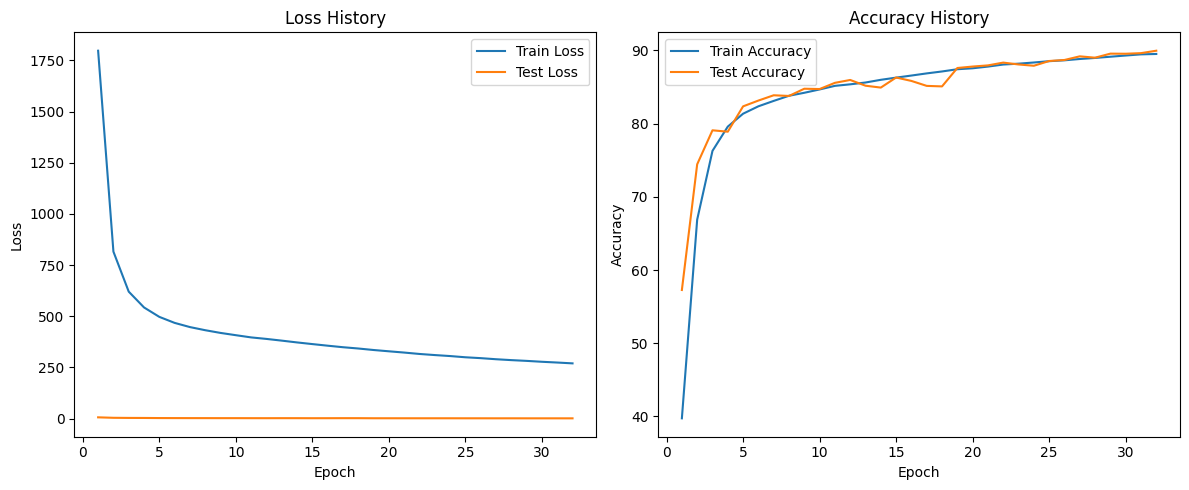

In [131]:
num_epochs=32
train_model([train_loader, test_loader], num_epochs, learning_rate=0.01)

In [133]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 89.96833333333333


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

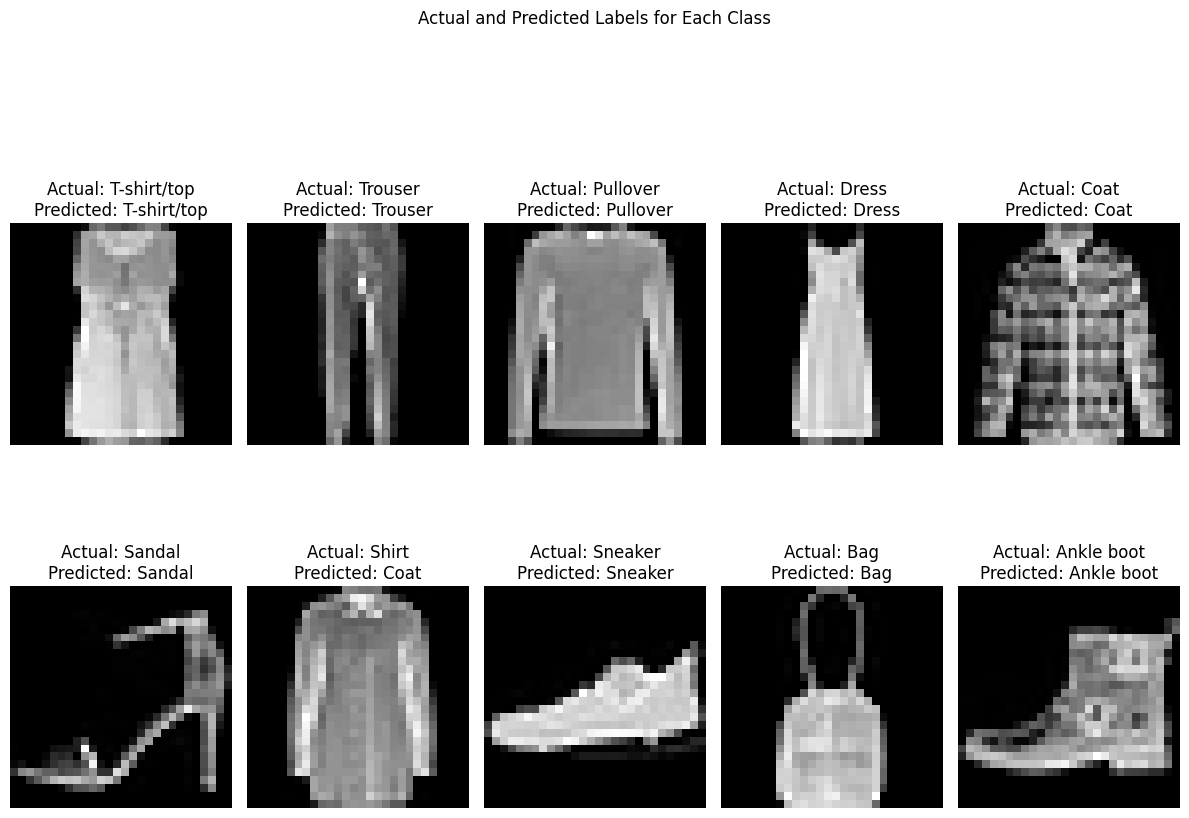

In [134]:
def visualize_predictions(test_loader, class_names, parameters):
    images, actual_labels, predicted_labels = [], [], []

    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            p = model(x, parameters)
            y_pred = p.argmax(dim=-1)
            images.append(x.cpu())
            actual_labels.append(y.cpu())
            predicted_labels.append(y_pred.cpu())

    images = torch.cat(images)
    actual_labels = torch.cat(actual_labels)
    predicted_labels = torch.cat(predicted_labels)

    plt.figure(figsize=(12, 10))
    plt.suptitle("Actual and Predicted Labels for Each Class")

    # Track indices for the first occurrence of each class
    first_occurrences = {label: None for label in range(len(class_names))}

    for idx, label in enumerate(actual_labels):
        if first_occurrences[label.item()] is None:
            first_occurrences[label.item()] = idx

    for i in range(len(class_names)):
        idx = first_occurrences[i]
        img = images[idx].squeeze()
        actual_label = actual_labels[idx].item()
        predicted_label = predicted_labels[idx].item()

        plt.subplot(2, 5, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}")
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Call the function to visualize the predictions
visualize_predictions(test_loader, class_names, parameters)
